## COVID Paper Exploration Workshop

This workshop explores the use of [Azure Text Analytics](https://azure.microsoft.com/services/cognitive-services/text-analytics/?WT.mc_id=academic-49822-dmitryso) and [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/language-service/text-analytics-for-health/overview/?WT.mc_id=academic-49822-dmitryso) to get some insights from a large corpus of COVID medical papers. Full version of the workshop is available [here](http://eazify.net/paper-exploraton-workshop). 

Let's start by importing some of the required libraries:

In [182]:
import pandas as pd
import numpy as np
import datetime
import sys
import requests
import json
import time
import pickle
import bz2
import matplotlib.pyplot as plt


### Milestone 1: Getting the Dataset

In our example, we will only analyze a subset of paper abstracts. All paper metadata is available in **Metadata file** [Metadata.csv](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv). You need to:

1. Download [metadata.csv](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) file from Kaggle (you may need to log in / register first)
1. Place it in the `data` directory and unzip if needed.

> Notice that `metadata.csv` file is rather large, more than 1 Gb. This may cause file processing to be slow at some times. You should not be surprised, as we are dealing with rather large amounts of real world data!

We can then use Pandas library to load the file:

In [143]:
# Provide the code to load and display the first rows of the dataset.

# If you are short on time, you can also load the old version of the dataset directly over the network:
# df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


**Pandas** is a very frequently used Python library to manipulate tabular data. You can [read more](https://github.com/microsoft/Data-Science-For-Beginners/tree/main/2-Working-With-Data/07-python) about using Pandas for data processing in our [Data Science for Beginners Curriculum](https://github.com/microsoft/Data-Science-For-Beginners/).

## Milestone 2: Initial Data Cleanup

Once we have the data, you need to do some data cleanup. First, let's see which columns we have. Show the list of all columns and find out their `dtype`-s.

In [144]:
# Code here

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')

All columns are not typed (have `dtype='object'`), but in some cases we want to perform some specific operations on them. Let's start by converting `publish_time` column to to `datetime`, and abstracts to `str`: 

In [145]:
# Use Pandas `astype` function

Now let's explore the range of dates of our publications. You can display the date range, or plot the histogram of publications by date (eg. how many publications were published at different dates):

<AxesSubplot:>

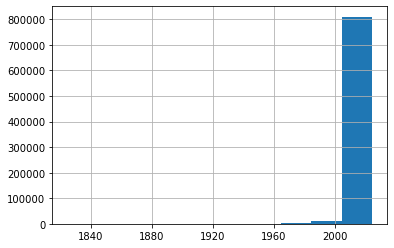

In [146]:
# Plot the histogram of publish_time column

Notice that publications go back to as early as 19th century - this is because the dataset contains all publications on coronaviruses, even the pre-COVID ones. Let's focus on the time period from January 2020 up to today. Filter out all the publications that are out of this range:

<AxesSubplot:>

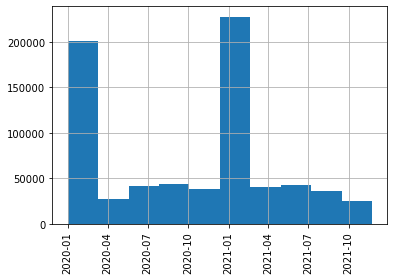

In [147]:
# Limit dataset to only those dates that are within 2020-present time
# You can store the result back into df

## Milestone 3: Creating and Using Text Analytics Endpoint

At this point, you should have your Azure subscription ready. Start by logging into [Azure Portal](http://portal.azure.com/?WT.mc_id=academic-49822-dmitryso).

Then, create [Azure Cognitive Service for Language](https://docs.microsoft.com/azure/cognitive-services/language-service/overview/?WT.mc_id=academic-49822-dmitryso) cloud resource. You can start creating the resource by clicking [**HERE**](https://ms.portal.azure.com/#create/Microsoft.CognitiveServicesTextAnalytics) - it will take you to the corresponding page on the Azure Portal.

> Make sure to select **S - Standard** pricing tier, because Health Analytics is not available under the Free Tier.

Once you have create the resource, you should go to the portal and copy **Endpoint URL** and **Access key**:


In [148]:
endpoint = 'place URL here'
key = 'place key here'

To access the Cognitive Service for Language we need to install corresponding Python SDK:

In [149]:
!{sys.executable} -m pip install azure.ai.textanalytics

Now, let's create an object to call the service. On Microsoft Docs, you can find the [documentation and sample code](https://docs.microsoft.com/azure/cognitive-services/language-service/text-analytics-for-health/quickstart?WT.mc_id=academic-49822-dmitryso&pivots=programming-language-python#code-example):

In [150]:
# text_analytics_client = ...

Let's call the service and process first 3 abstracts. You can process up to 10 documents in a single call:

In [151]:
inp = [df['abstract'].iloc[i] for i in range(5)] # documents to analyze

def analyze(arr):
    # provide code to analyze the list of documents
    return []
    
print(analyze(inp))

[AnalyzeHealthcareEntitiesResult(id=0, entities=[HealthcareEntity(text=Dexmedetomidine, normalized_text=dexmedetomidine, category=MedicationName, subcategory=None, assertion=None, length=15, offset=12, confidence_score=1.0, data_sources=[HealthcareEntityDataSource(entity_id=C0113293, name=UMLS), HealthcareEntityDataSource(entity_id=N05CM18, name=ATC), HealthcareEntityDataSource(entity_id=0000016239, name=CHV), HealthcareEntityDataSource(entity_id=DB00633, name=DRUGBANK), HealthcareEntityDataSource(entity_id=4219, name=GS), HealthcareEntityDataSource(entity_id=d04505, name=MMSL), HealthcareEntityDataSource(entity_id=D020927, name=MSH), HealthcareEntityDataSource(entity_id=67VB76HONO, name=MTHSPL), HealthcareEntityDataSource(entity_id=C47479, name=NCI), HealthcareEntityDataSource(entity_id=67VB76HONO, name=NCI_FDA), HealthcareEntityDataSource(entity_id=008084, name=NDDF), HealthcareEntityDataSource(entity_id=48937, name=RXNORM), HealthcareEntityDataSource(entity_id=437750002, name=SNOMED

Now let's see all the entities we have extracted with corresponding entity types:

In [152]:
# Code here

coronavirus disease 2019 (Diagnosis)
COVID-19 (Diagnosis)
severe acute respiratory syndrome coronavirus-2 (Diagnosis)
SARS-CoV-2 (Diagnosis)
SARS (Diagnosis)
MERS (Diagnosis)
H1N1 (Diagnosis)
Ebola (Diagnosis)
COVID-19 (Diagnosis)
drugs (TreatmentName)
cure (TreatmentName)
vaccines (TreatmentName)
prevention (TreatmentName)
major protease (GeneOrProtein)
M pro (GeneOrProtein)
RNA-dependent RNA polymerase (GeneOrProtein)
RdRp (GeneOrProtein)
proteins (GeneOrProtein)
SARS-CoV-2 (Diagnosis)
drug (TreatmentName)
COVID-19 (Diagnosis)
RdRp (GeneOrProtein)
coronaviruses (Diagnosis)
SARS-CoV (Diagnosis)
MERS-CoV. (Diagnosis)
RdRp (GeneOrProtein)
docking (ExaminationName)
wise (GeneOrProtein)
antibiotics (MedicationClass)
NSAIDs (MedicationClass)
hypolipidemic (MedicationClass)
coagulant (MedicationClass)
thrombolytic (MedicationClass)
anti-allergics (MedicationClass)
molecular dynamics (ExaminationName)
pitavastatin (MedicationName)
ridogrel (MedicationName)
rosoxacin (MedicationName)
ARG555 (

## Milestone 4: Processing Abstracts

Now it's time to go big and process abstracts at scale! However, because we are limited in time, and we do not want to waste your cloud resources, we will process only a limited number of random abstracts (say, 200-500). 

Keep in mind that some abstracts are not present (they will have 'NaN' )

> It is important to select abstracts randomly, because later on we will want to explore the change is treatment tactics over time, and we need to have uniform paper representation across all time period. Alternatively, to further minimize time/spend, you can select a time sub-interval (say, only year 2020), and then process random papers in that interval. 

Spend some time thinking about the way you will store the result of processing. You can add processing results as additional columns to the DataFrame, or you can use separate list/dictionary.

> You want to make sure that for each paper you keep essential info such as title and publication time, together with all entities and relations.

Processing can take quite a long time. You may start (and proceed until the end of the workshop) with small sample size (~50 papers) to make sure your code works and your data structure is right, and then increase the sample size to 200-500 towards the end to obtain the results. 

> **NOTE**: If this assignment seems to difficult, or you do not have enough time to process sufficiently many abstracts - you can go to the next cell to load up pre-processed results that we have put together for you. However, designing your own storage format and doing this yourself is a great exercise. 

In [238]:
# Provide the code here
# You can store the results into a variable named store

......................................................................................................................................................

To make sure we can reuse the results later in case we need to restart the jupyter kernel or come back to the workshop next time, we can store the processing results on disk. Use `pickle` library for this. Here `store` is the variable name where the result of the processing is stored.

In [239]:
with bz2.BZ2File('..\data\processed-1.pkl.bz2','w') as f:
    pickle.dump(store,f)

Now at any time we can load the data and start data processing from there.

> If you do not want to wait until processing all data, you can open our pre-processed collection of papers right away using the code below:

In [240]:
with bz2.BZ2File('..\data\processed.pkl.bz2','r') as f:
    store = pickle.load(f)

## Milestone 5: Get Top Symptoms, Medications and Diagnoses

To simplify further data processing, let's build the DataFrame of all entities. We shall go through all papers and populate a DataFrame as a result.

> Each entity has links to **ontologies**, which are structured hierarchies of medical terms. For example, [Unified Medical Language System](https://en.wikipedia.org/wiki/Unified_Medical_Language_System), or UMLS, contains codes for all medications, diagnoses, treatments, etc. Several terms, such as **SARS-Cov-2** and **COVID-19** can refer to the same entity, so to account for that we shall also extract and store UMLS ontology ID for each entity. 

In [263]:
def get_umls(entity):
    # write code to extract UMLS ontology ID from a given entity. You may need to display and entity
    # first to understand its structure

entities = ... # write code to create a DataFrame of Entities

entities

,text,category,umls,publish_time,title
0,Covid-19,Diagnosis,C5203670,2020-01-01,The Hopeless University: Intellectual Work at ...
1,scarring,SymptomOrSign,C2004491,2020-01-01,The Hopeless University: Intellectual Work at ...
2,COVID-19,Diagnosis,C5203670,2020-01-01,Chest CT in COVID-19 pneumonia: A review of cu...
3,chest computed tomography (CT,ExaminationName,None,2020-01-01,Chest CT in COVID-19 pneumonia: A review of cu...
4,emergency departments,CareEnvironment,None,2020-01-01,Chest CT in COVID-19 pneumonia: A review of cu...
...,...,...,...,...,...
40639,statins,MedicationClass,C0360714,2020-07-20,"Genetic validation of the use of tocilizumab, ..."
40640,COVID-19,Diagnosis,C5203670,2020-07-20,"Genetic validation of the use of tocilizumab, ..."
40641,anakinra,MedicationName,C0245109,2020-07-20,"Genetic validation of the use of tocilizumab, ..."
40642,RECOVERY trial,AdministrativeEvent,None,2020-07-20,"Genetic validation of the use of tocilizumab, ..."


Let's explore which entity types are most commonly observed:

In [264]:
# Use value_counts() function to count number of times different categories are observed

Diagnosis               11013
ExaminationName          4959
TreatmentName            4109
SymptomOrSign            3103
MeasurementValue         1785
GeneOrProtein            1780
Time                     1672
AdministrativeEvent      1479
ConditionQualifier       1468
BodyStructure            1178
MedicationName           1082
Course                   1050
HealthcareProfession      817
CareEnvironment           805
Age                       796
MeasurementUnit           594
MedicationClass           563
RelationalOperator        442
Gender                    440
FamilyRelation            302
Date                      273
Expression                216
MutationType              169
Dosage                    145
Direction                 106
Frequency                  96
MedicationRoute            69
Variant                    66
Allergen                   24
MedicationForm             23
ConditionScale             20
Name: category, dtype: int64

To be able to find top-mentioned diagnoses and symptoms, we will build a frame that contains number of mentions for each of the entity, based on it's ontology ID.

In [265]:
entcount = ... # Produce a dataframe that shows how often different UMLS IDs are mentioned in the dataset
entcount

,text,category,count
umls,,,
C0000726,abdomen,BodyStructure,3
C0000727,acute abdomen,Diagnosis,1
C0000737,abdominal pain,SymptomOrSign,6
C0000768,birth defects,Diagnosis,4
C0000833,abscesses,SymptomOrSign,2
...,...,...,...
C5396784,point-of-care ultrasound,ExaminationName,1
C5397185,SARS-CoV-2 IgM,ExaminationName,2
C5397186,SARS-CoV-2 IgG,ExaminationName,1


From this DataFrame, we can easily find out top mentioned diagnoses and symptoms:

In [266]:
# Code here

Diagnosis


,text,category,count
umls,,,
C5203670,Covid-19,Diagnosis,3790
C3714514,infection,Diagnosis,502
C0012634,disease,Diagnosis,499
C0011065,death,Diagnosis,215
C0042769,virus,Diagnosis,213
C0206750,coronavirus,Diagnosis,202
C0026565,mortality,Diagnosis,167
C0006826,cancer,Diagnosis,121
C5203676,severe acute respiratory syndrome coronavirus 2,Diagnosis,116


SymptomOrSign


,text,category,count
umls,,,
C1457887,symptoms,SymptomOrSign,154
C0015967,Fever,SymptomOrSign,91
C0229992,mental,SymptomOrSign,74
C0080194,strain,SymptomOrSign,67
C0231221,asymptomatic,SymptomOrSign,51
C0038435,stress,SymptomOrSign,51
C0013404,shortness of breath,SymptomOrSign,48
C0010200,cough,SymptomOrSign,42
C3827002,ground-glass opacities,SymptomOrSign,26


TreatmentName


,text,category,count
umls,,,
C0087111,treatments,TreatmentName,285
C0042196,vaccine,TreatmentName,121
C0013227,medications,TreatmentName,102
C0543467,surgery,TreatmentName,83
C0199176,prevention,TreatmentName,68
C0042210,vaccines,TreatmentName,61
C1443871,PPE,TreatmentName,55
C0184661,interventions,TreatmentName,55
C0034386,quarantine,TreatmentName,53


MedicationName


,text,category,count
umls,,,
C0020336,hydroxychloroquine,MedicationName,99
C0008269,chloroquine,MedicationName,43
C0939237,lopinavir + ritonavir,MedicationName,28
C4726677,Remdesivir,MedicationName,27
C1609165,tocilizumab,MedicationName,27
C0052796,azithromycin,MedicationName,18
C0292818,ritonavir,MedicationName,18
C0028066,nifedipine,MedicationName,13
C0915082,Isopulegol,MedicationName,13


MedicationClass


,text,category,count
umls,,,
C0003451,antivirals,MedicationClass,56
C0003232,antibiotics,MedicationClass,34
C0001617,corticosteroid,MedicationClass,33
C0038317,steroids,MedicationClass,18
C0003280,anticoagulation,MedicationClass,18
C0040615,antipsychotic,MedicationClass,13
C0003015,angiotensin-converting enzyme inhibitors,MedicationClass,11
C1963724,antiretroviral therapy,MedicationClass,10
C0521942,angiotensin II receptor blockers,MedicationClass,10


For the sake of interest, let's build the word cloud of all diagnoses. You can use [this tutorial](https://www.datacamp.com/community/tutorials/wordcloud-python) as a guideline.

In [161]:
# Install wordcloud using either of those two methods if you do not have it:
# !conda install -c conda-forge wordcloud
# !{sys.executable} -m pip install wordcloud
import wordcloud as wc

(-0.5, 399.5, 199.5, -0.5)

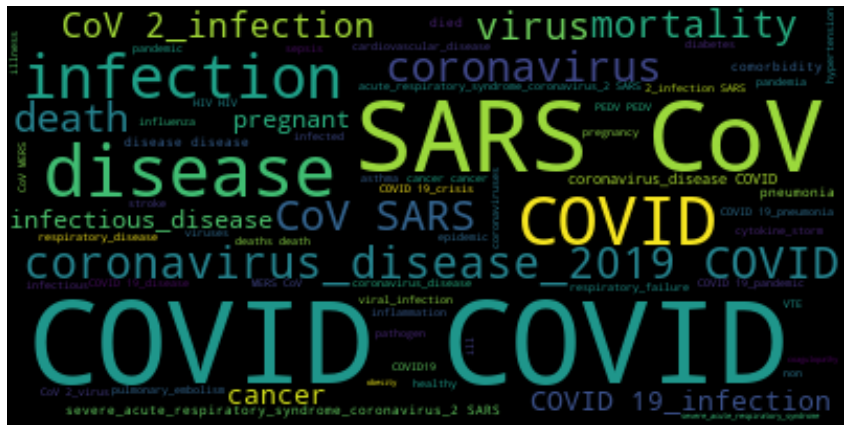

In [246]:
# Code here

## Milestone 6: Visualize Change in Treatment Strategies

In addition to calculating total count of mentions, you can see how they are distributed by month, and this detect changes in treatment strategies. Select top medications/strategies and compute the distribution of their mentions by months (or weeks). First, get the list of top-5 UMLS IDs for medications and medication classes (AKA treatment strategies):

In [267]:
# Code here

Now we can select only those entities that have umls id's within the top id list, and then group them my month:

In [281]:
# Hint: to group by month, use original entities DataFrame, and convert publish_time column
# to monthly index using astype('datetime64[M]')
medhist = ...
medhist

C:\Users\dmitryso\AppData\Local\Temp/ipykernel_68112/1035193559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meds['month'] = meds['publish_time'].astype('datetime64[M]')


text
month      umls          
2020-01-01 C0001617    12
           C0003232    17
           C0003280    16
           C0003451    43
           C0038317     1
2020-02-01 C0003232     1
2020-03-01 C0003232     9
           C0003451     1
2020-04-01 C0003451     4
           C0038317     1
2020-05-01 C0001617     9
           C0003232     2
           C0003280     1
           C0003451     4
2020-06-01 C0001617     2
           C0003232     3
           C0003451     2
2020-07-01 C0001617     5
           C0003232     1
           C0003280     1
           C0003451     1
           C0038317     1
2020-08-01 C0001617     5
           C0003232     1
           C0003451     1
           C0038317    15

Finally, plot the result. 

> You may use the bar plot or a series of line plots, and you many need to reset the index (using `reset_index()`) and layout indexing differently (using `pivot`). 

(0.0, 10.0)

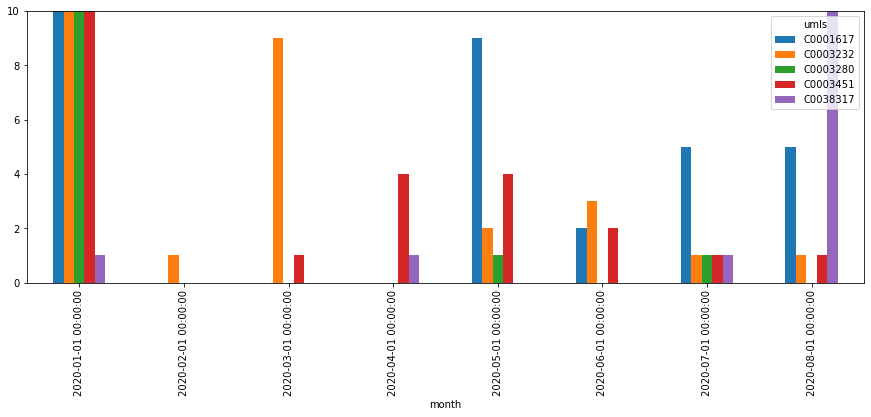

In [286]:
# Code here 
# You may need to set y axis limits using ax.set_ylim([0,10]) for it to look good

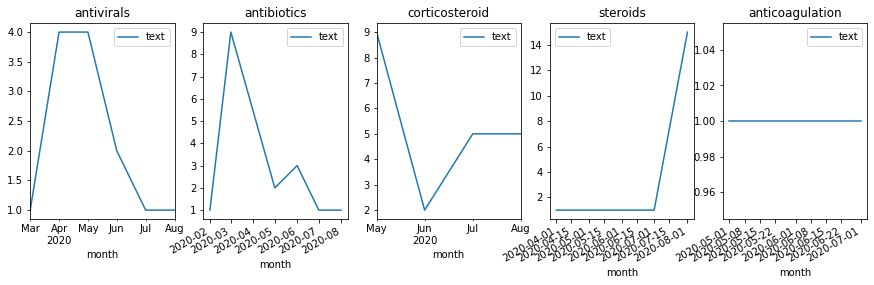

In [297]:
# Now plot the changes in mentions using graphs for different medication types

## Milestone 7: Visualize Co-occurrence of Terms

It is interesting to see which terms occur together within one paper, because it can give us an idea about relationships between, for example, diagnoses and medications, or symptoms and treatments. You should also be able to see which medications are often used together, and which symptoms occur together.

You can use two types of diagrams for that:

* A **Sankey diagram** allows us to investigate relations between two types of terms, eg. diagnosis and treatment
* A **Chord diagram** helps to visualize co-occurrence of terms of the same type (eg. which medications are mentioned together)

To plot both diagrams, we need to compute co-occurrence matrix, which in the row i and column j contains number of co-occurrences of terms i and j in the same abstract (one can notice that this matrix is symmetric).


In [347]:
medclass_ontology = {
    'C0003451' : ('antivirals',0),
    'C0003232' : ('antibiotics',1),
    'C0001617' : ('corticosteroid',2),
    'C0038317' : ('steroids',2),
    'C0003280' : ('anticoagulation',3) }

diag_ontology = {
    'C5203670' : ('Covid-19',0),
    'C3714514' : ('infection',1),
    'C0011065' : ('death',2),
    'C0042769' : ('virus',3),
    'C0206750' : ('coronavirus',3),
    'C0026565' : ('mortality',2),
    'C0006826' : ('cancer',4),
    'C5203676' : ('SARS',5) }

med_ontology = {
    'C0020336' : ('hydroxychloroquine',0),
    'C0008269' : ('chloroquine',0),
    'C0939237' : ('lopinavir + ritonavir',1),
    'C4726677' : ('Remdesivir',2),
    'C1609165' : ('tocilizumab',3),
    'C0052796' : ('azithromycin',4),
    'C0292818' : ('ritonavir',5) }

In [348]:
# Define a function that will populate co-occurence matrix based on two ontologies

def get_matrix(cat1, cat2):
    a = np.zeros((len(cat1),len(cat2)))

    # Write code to populate matrix here
    
    return a

print(get_matrix(medclass_ontology,diag_ontology))

[[33. 14.  9. 14.  1.  6.  0.  0.]
 [ 9.  4.  4.  3.  0.  1.  0.  0.]
 [15.  3.  3.  4.  0.  0.  0.  0.]
 [10.  3.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]



To actually plot the diagrams, we can use [Plotly](https://plotly.com/python/) graphics library. This process is well described [here](https://plotly.com/python/sankey-diagram/).


In [ ]:
#Write code to install and then import Plotly

In [303]:
# Write a code to produce the following visualization

To plot chord diagram, you can use [Holoviews](https://holoviews.org/) library. You may need to install it first.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
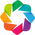

In [304]:
# !conda install -c pyviz holoviews bokeh

import holoviews as hv
hv.extension("bokeh")

In [346]:
# Write a code to produce the following chord diagram 

:Chord   [src,dst]   (count)

## What to do next

Now that you have learnt how you can use knowledge extraction from text, you can try to apply this to different problems. For different knowledge domains, however, you would need to train your own NER neural network model, and for that you will also need a dataset. [Custom Named Entity Recognition](https://docs.microsoft.com/azure/cognitive-services/language-service/custom-named-entity-recognition/overview/?WT.mc_id=academic-49822-dmitryso) service can help you do that. However, [Text Analytics Service](https://azure.microsoft.com/en-us/services/cognitive-services/text-analytics/?WT.mc_id=academic-49822-dmitryso) also has some [pre-built entity extraction mechanism](https://docs.microsoft.com/azure/cognitive-services/language-service/named-entity-recognition/concepts/named-entity-categories/?WT.mc_id=academic-49822-dmitryso), as well as keyword extraction.

Some of the projects you may want to build:

* Analyze a blog or social network posts and get the idea of different topics that author is writing about. See how interests change over time, as well as the mood. You can use the blog of [Scott Hanselman](https://www.hanselman.com/), it goes back to [2002](https://www.hanselman.com/blog/archive/2002).
* Analyze [COVID 19 twitter feed](https://github.com/thepanacealab/covid19_twitter) to see if you can extract changes in major topics on twitter.
* Analyze your e-mail archive to see how the topics you discuss and your mood change over time. Most e-mail clients allow you to export your e-mails to plain text or CSV format (here is an [example for Outlook](https://support.microsoft.com/office/import-and-export-outlook-email-contacts-and-calendar-92577192-3881-4502-b79d-c3bbada6c8ef/?WT.mc_id=academic-49822-dmitryso)).





